In [2]:
import numpy as np 
import pandas as pd
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns 

## The Newton-Raphson method for numerical Analysis

The NR method is used to calculate an aproximation of the roots of function.

Newton-Raphson iterative method $\rightarrow x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$

Requiring an **initial value**: $x_{0}$

In [3]:
# Symbol instance for the variable
x = Symbol('x')

# A string as an input to convert to a mathematical expression
func_str = 'exp(x) - x**2'

# The input function is converted to a SymPy expression
func = sympify(func_str).expand()

# Converted to a function
f = lambdify(x, func)

# compute the first derivate
df = lambdify(x, func.diff(x))

def Newton_Raphson(x_i, i):
    """## Newton Raphson Method
    Using the formula for Newton-Rapshon recursion to compute 
    the roots of a real-valued continuous and differentiable 
    function, given an initial value.

    ### Parametters
    - x_i: Short for 'x initial'. The initial value for the recursion
    to start with.

    - i: The number of iterations desired.
    """
    if i == 0:
        # The first value x_0 attatched to i=0
        print('Initial value: x_0 =', x_i)
        return x_i
    else:
        # Reduce the iteration number progresively
        i -= 1
        
        # Compute for the immediately previous value
        x_I = Newton_Raphson(x_i, i)

        # NR formula 
        x_II = x_I - (f(x_I) / df(x_I))

        print(f'Iteration {i+1}  |  x_{i+1} = {x_II}')
        return x_II

Newton_Raphson(1, 10)

Initial value: x_0 = 1
Iteration 1  |  x_1 = -1.3922111911773332
Iteration 2  |  x_2 = -0.8350875293671394
Iteration 3  |  x_3 = -0.7098340945745987
Iteration 4  |  x_4 = -0.7034834042362847
Iteration 5  |  x_5 = -0.703467422599462
Iteration 6  |  x_6 = -0.7034674224983917
Iteration 7  |  x_7 = -0.7034674224983917
Iteration 8  |  x_8 = -0.7034674224983917
Iteration 9  |  x_9 = -0.7034674224983917
Iteration 10  |  x_10 = -0.7034674224983917


-0.7034674224983917

In [4]:
# Symbol instance for the variable
x = Symbol('x')

func_str = '(x-3)*(x-1)*(x-1)'

# The input function is converted to a SymPy expression
func = sympify(func_str).expand()

# Converted to a function
f = lambdify(x, func)

# compute the first derivate
df = lambdify(x, func.diff(x))

df2 = lambdify(x, func.diff(x,x))

def Newton_Raphson_m(x_i, i):
    """## Newton Raphson Method
    Using the formula for Newton-Rapshon recursion to compute 
    the roots of a real-valued continuous and differentiable 
    function, given an initial value.

    ### Parametters
    - x_i: Short for 'x initial'. The initial value for the recursion
    to start with.

    - i: The number of iterations desired.
    """
    if i == 0:
        # The first value x_0 attatched to i=0
        print('Initial value: x_0 =', x_i)
        return x_i
    else:
        i -= 1
        x_I = Newton_Raphson(x_i, i)
        x_II = x_I - (f(x_I)*df(x_I))/(df(x_I)**2 - f(x_I)*df2(x_I))

        print(f'Iteration {i+1}  |  x_{i+1} = {x_II}')
        return x_II

Newton_Raphson_m(0, 10)

Initial value: x_0 = 0
Iteration 1  |  x_1 = 0.42857142857142855
Iteration 2  |  x_2 = 0.6857142857142857
Iteration 3  |  x_3 = 0.8328654004954585
Iteration 4  |  x_4 = 0.9133298932566344
Iteration 5  |  x_5 = 0.955783292965739
Iteration 6  |  x_6 = 0.9776551012729385
Iteration 7  |  x_7 = 0.9887661675236611
Iteration 8  |  x_8 = 0.9943674406865725
Iteration 9  |  x_9 = 0.9971797713100611
Iteration 10  |  x_10 = 1.000001982824608


1.000001982824608

There is some other aspects of the method that need to be included in the function. Those are goinng to be implemented in the finall packaged version of the system.

### Plotting concept

It seems interesting if the user is able to see how the method works (geometrically) to calculate the aproximation.

That would require an extra effort. For now, let's just plot the function.

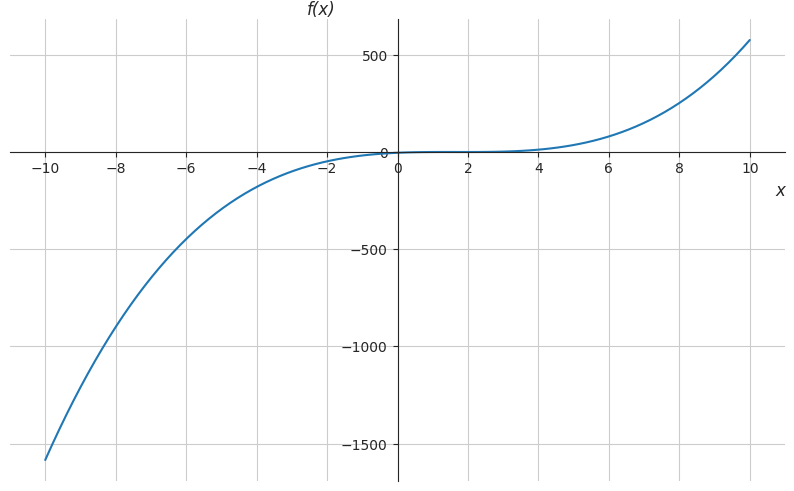

In [15]:
%matplotlib inline
sns.set_style('ticks')
# x**2 - 1 function

x = np.linspace(-10,10,100)

y = x**3 - 5*(x**2) + 8*x - 4

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y)

# To get a "text book" look: relocate the spines of the figure
ax.spines[["left", "bottom"]].set_position('zero')
ax.spines[["top", "right"]].set_visible(False)

ax.set_xticks(np.arange(-10,12,2)) # modify the xticks

# setting the name of x and y axis
ax.set_xlabel('x', loc='right', fontstyle='italic', fontsize='large')
ax.set_ylabel('f(x)', loc='top', fontstyle='italic', fontsize='large', rotation='horizontal')
ax.grid(True, which='both') # plotting a grid